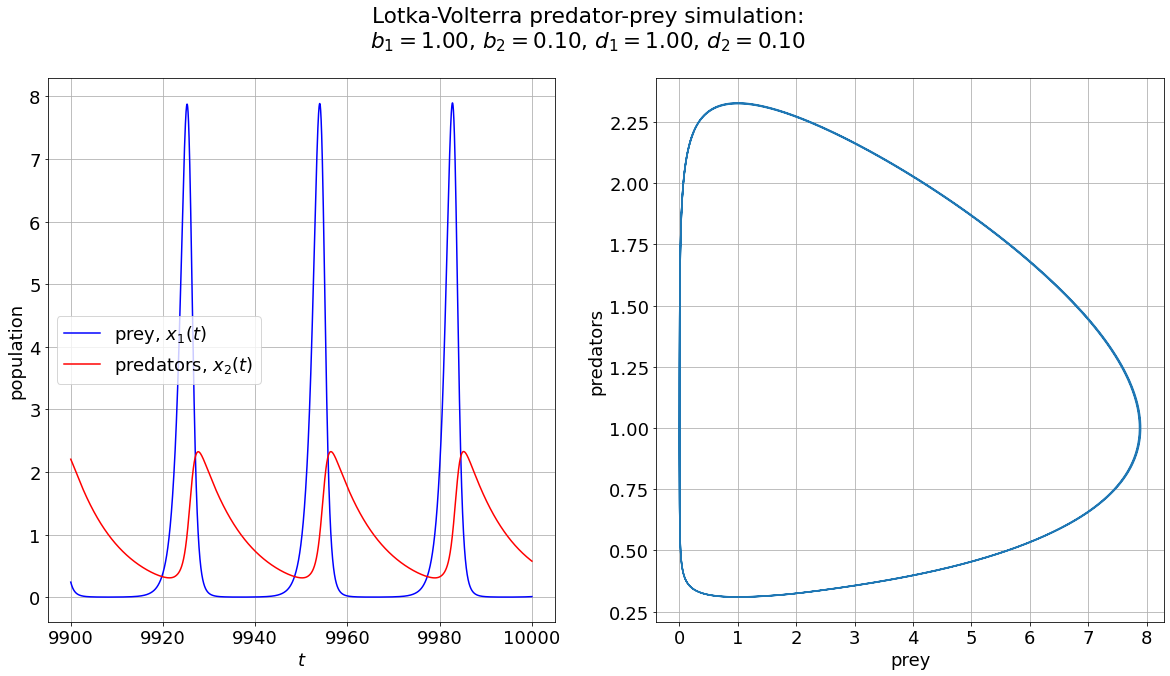

In [11]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

def predator_prey_RHS(t,populations,birth_rates,death_rates,prey_capacity):
    prey_pop = populations[0]
    pred_pop = populations[1]

    prey_birth_rate = birth_rates[0]
    prey_death_rate = death_rates[0]

    pred_birth_rate = birth_rates[1]
    pred_death_rate = death_rates[1]

    prey_pop_rate_of_change = prey_pop*(prey_birth_rate*(1 - prey_pop/prey_capacity) - prey_death_rate*pred_pop)

    pred_pop_rate_of_change = pred_pop*(pred_birth_rate*prey_pop - pred_death_rate)

    return [prey_pop_rate_of_change, pred_pop_rate_of_change]

# Assign values to parameters of the predator-prey model:
b_1 = 1 # prey population birth rate
d_1 = 1 # prey population death rate
k_1 = 1e5 # prey population carrying capacity

b_2 = 0.1 # predator population birth rate
d_2 = 0.1 # predator population death rate

birth_rates = [b_1,b_2]
death_rates = [d_1,d_2]

# Pick initial population sizes and store them as a list:
init_prey_pop = 10
init_pred_pop = 1
init_pops = [init_prey_pop,init_pred_pop]

# Define a time window for simulation:
t0 = 0
tF = 10000
Npts = tF*100 + 1 # this many timesteps from t0 to tF
tList = np.linspace(t0,tF,Npts)

### Simulate ###
# note: using a more sophisticated solver than discussed in the earlier examples, but the basic principle is the same
result = integrate.solve_ivp(predator_prey_RHS,(t0,tF),init_pops,args=(birth_rates,death_rates,k_1),t_eval=tList)
sol = result.y
t = result.t

plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams["font.size"] = "18"

fig, (ax1,ax2) = plt.subplots(1,2)
title_str = ('Lotka-Volterra predator-prey simulation:\n$b_1 = {:.2f}$, $b_2 = {:.2f}$, $d_1 = {:.2f}$, $d_2 = {:.2f}$'.format(b_1,b_2,d_1,d_2))
fig.suptitle(title_str)

ax1.plot(t[-10000:-1],sol[0,-10000:-1],'b',label='prey, $x_1(t)$')
ax1.plot(t[-10000:-1],sol[1,-10000:-1],'r',label='predators, $x_2(t)$')
ax1.legend(loc='best')
ax1.set(xlabel='$t$',ylabel='population')
ax1.grid()

ax2.plot(sol[0,-10000:-1],sol[1,-10000:-1])
ax2.grid()
ax2.set(xlabel='prey',ylabel='predators')
plt.show()